# Linear Regression

  ##### Y = wX+b

    Y -> Dependent Variable
    X -> Independent Variable
    w -> Weight
    b ->bias

  #### Gradient Descent:-
        is an optimization algorism used for minimizing the
        loss function in various machine learning algorisms.
        it's used for updating the parameters of learning
        model.

   ##### w = w - a * dw
   ##### b = b - a * db

  #### Learning Rate:-
        is tuning parameter in an optimization algorism that
        determines the step size at each iteration while
        moving toward a minimum of a loss function. 
        

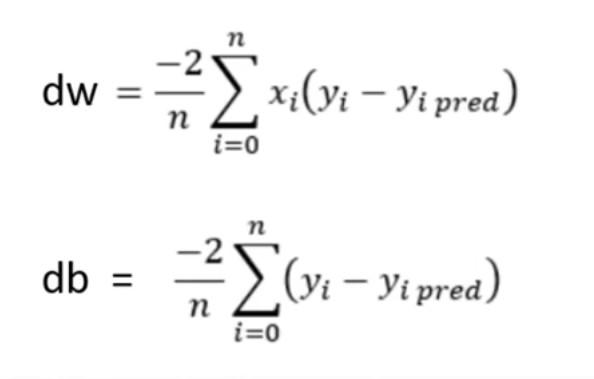

## Linear Regression

In [1]:
import numpy as np
class Linear_Regression_1:
        
    def __init__(self,learning_rate,no_of_iterations):
        # initating the parameters (learning rate,number of iterations)
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        
    def fit(self,X,Y):
        #number of training examples and number of features
        self.m, self.n = X.shape #number of rows and columns

        #initating the weight and bias
        self.w = np.zeros(self.n) # handling more than one feature
        self.b = 0
        self.X = X
        self.Y = Y

        #impleminting Gredient descent
        for i in range(self.no_of_iterations):
            self.update_weights()

    
    def update_weights(self):
        Y_prediction = self.predict(self.X)

        #calculate the gradient
        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = - 2 * np.sum(self.Y - Y_prediction) / self.m

        #updating the wights

        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
    
    def predict(self,X):
        return X.dot(self.w) + self.b

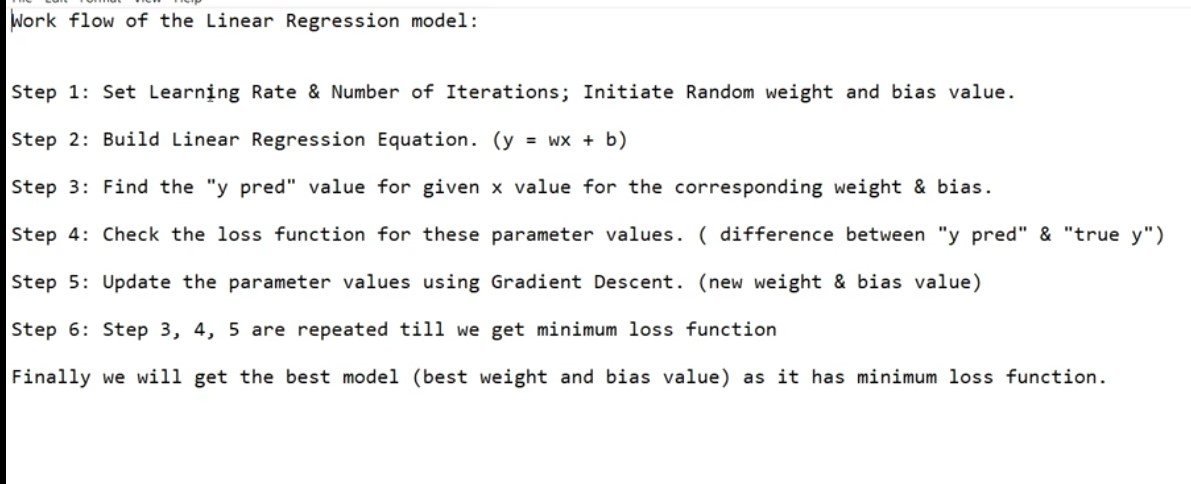

# Using Linear Regression

## Importing The Dependencies

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")


## Data Preprocessing

In [3]:
## loading the data
df = pd.read_csv('/kaggle/input/salary-data-dataset-for-linear-regression/Salary_Data.csv')

In [4]:
## display first 5 rows
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
## display last 5 rows
df.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [6]:
## display random 5 rows
df.sample(5)

,YearsExperience,Salary
9,3.7,57189
1,1.3,46205
17,5.3,83088
14,4.5,61111
11,4.0,55794


In [7]:
## display number of rows and columns in dataframe
df.shape

(30, 2)

In [8]:
## check missing values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
## check NAN values
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
## show some statistics about dataframe
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
df.std()

YearsExperience        2.837888
Salary             27414.429785
dtype: float64

In [12]:
df.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

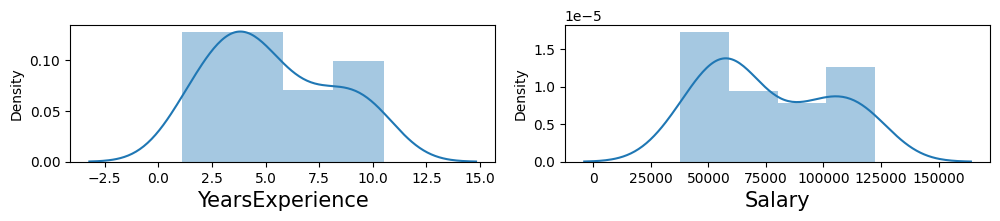

In [13]:
plt.figure(figsize=(20,40))
plotnum = 1
for columns in df:
    if plotnum <= len(df.columns) :
        ax=plt.subplot(20,4,plotnum)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=15)
    plotnum += 1
plt.tight_layout() 
plt.show()

<Axes: >

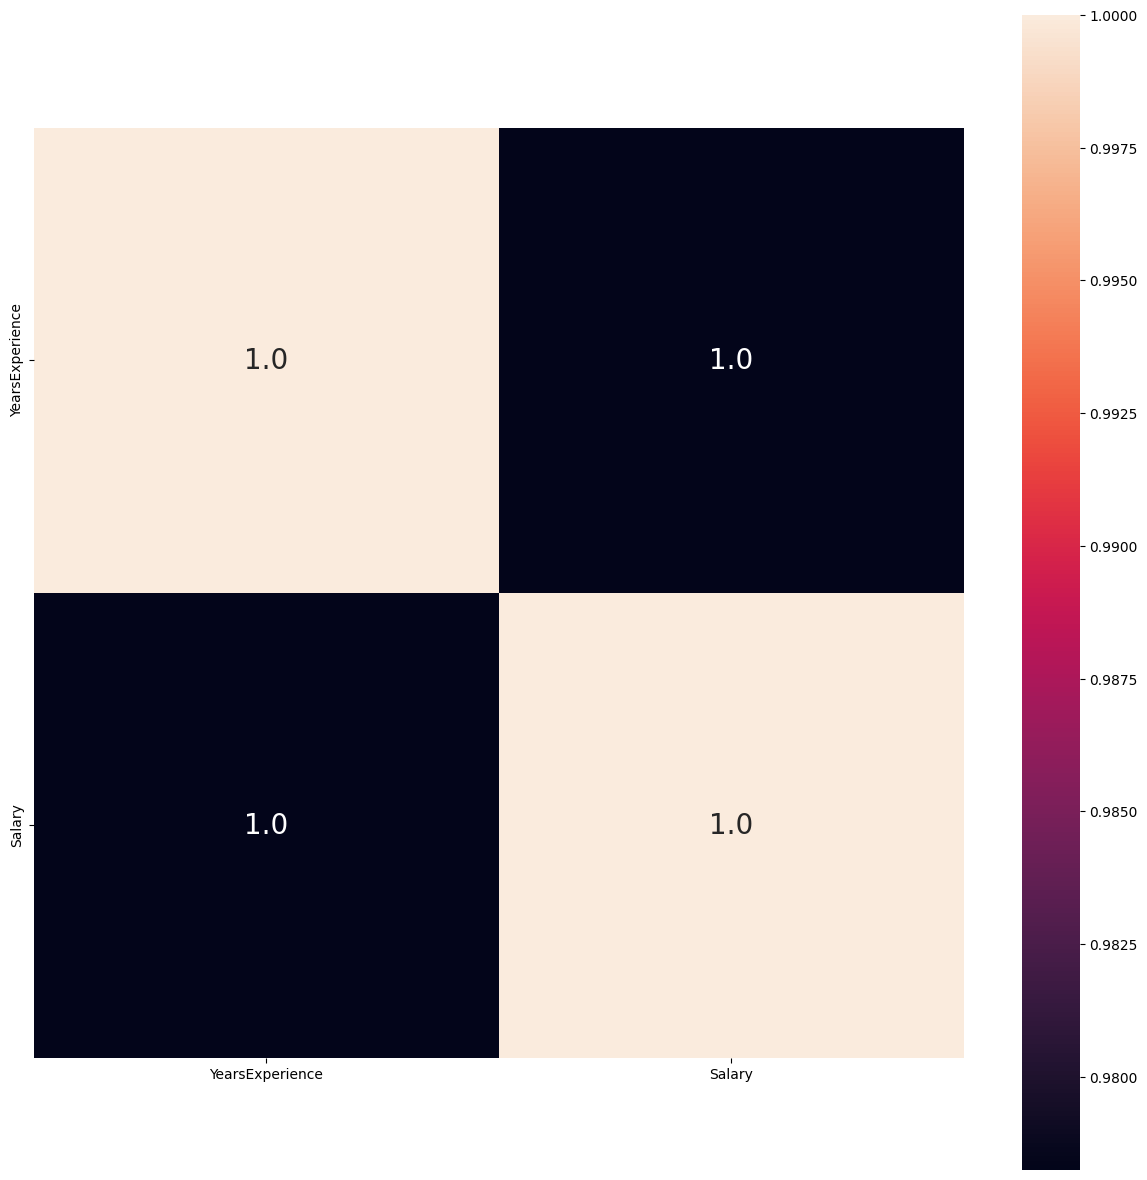

In [14]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,fmt='.1f',cbar=True,square=True,annot=True,annot_kws={'size':20})

In [15]:
## show some informations about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


## Splitting The Data Into Feture And Target

In [16]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [17]:
## sSplitting the data into trainning and testing data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

## Training Linear Regression Model

In [18]:
model = Linear_Regression_1(learning_rate=.01,no_of_iterations=10000)

In [19]:
model.fit(X_train,Y_train)

In [20]:
## printing values of weights & bias
print('The weights is: ',model.w[0])
print('The bias is: ',model.b)

The weights is:  9339.081723815261
The bias is:  25918.438334892813


In [21]:
y_prdicted_train=model.predict(X_train)

In [22]:
y_prdicted_test=model.predict(X_test)

## visualize predictions

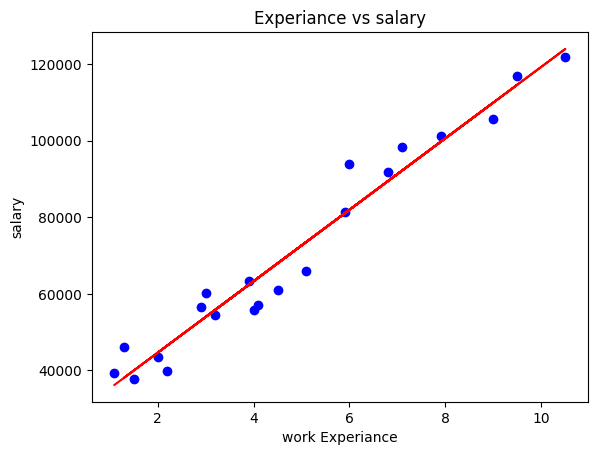

In [23]:
plt.scatter(X_train,Y_train,color='b')
plt.plot(X_train,y_prdicted_train,color='r')
plt.xlabel("work Experiance")
plt.ylabel("salary")
plt.title("Experiance vs salary")
plt.show()

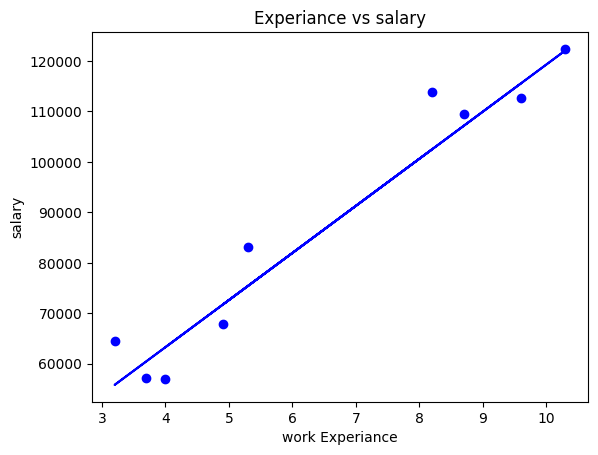

In [24]:
plt.scatter(X_test,Y_test,color='b')
plt.plot(X_test,y_prdicted_test,color='b')
plt.xlabel("work Experiance")
plt.ylabel("salary")
plt.title("Experiance vs salary")
plt.show()

# Linear Regression By clude Ai

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from typing import Optional, Tuple, List
import warnings

class LinearRegression_2:
    """
    Enhanced Linear Regression with advanced features and optimizations.
    
    Features:
    - Regularization (Ridge, Lasso, Elastic Net)
    - Feature scaling
    - Early stopping
    - Cost history tracking
    - Advanced metrics
    - Polynomial features
    - Cross-validation ready
    """
    
    def __init__(self, 
                 learning_rate: float = 0.01,
                 max_iterations: int = 1000,
                 regularization: Optional[str] = None,
                 alpha: float = 0.01,
                 l1_ratio: float = 0.5,
                 tolerance: float = 1e-6,
                 early_stopping: bool = True,
                 validation_split: float = 0.2,
                 random_state: int = 42,
                 normalize: bool = True):
        """
        Initialize Linear Regression model.
        
        Parameters:
        -----------
        learning_rate : float, default=0.01
            Learning rate for gradient descent
        max_iterations : int, default=1000
            Maximum number of iterations
        regularization : str, optional
            Type of regularization ('ridge', 'lasso', 'elastic_net')
        alpha : float, default=0.01
            Regularization strength
        l1_ratio : float, default=0.5
            L1 ratio for elastic net (0=Ridge, 1=Lasso)
        tolerance : float, default=1e-6
            Tolerance for early stopping
        early_stopping : bool, default=True
            Whether to use early stopping
        validation_split : float, default=0.2
            Fraction of data to use for validation
        random_state : int, default=42
            Random seed for reproducibility
        normalize : bool, default=True
            Whether to normalize features
        """
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.regularization = regularization
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.tolerance = tolerance
        self.early_stopping = early_stopping
        self.validation_split = validation_split
        self.random_state = random_state
        self.normalize = normalize
        
        # Initialize attributes
        self.weights_ = None
        self.bias_ = None
        self.cost_history_ = []
        self.val_cost_history_ = []
        self.n_iterations_ = 0
        self.scaler_ = None
        
        # Set random seed
        np.random.seed(self.random_state)
    
    def _add_polynomial_features(self, X: np.ndarray, degree: int = 2) -> np.ndarray:
        """Add polynomial features to the input."""
        if degree == 1:
            return X
        
        n_samples, n_features = X.shape
        poly_features = [X]
        
        for d in range(2, degree + 1):
            for i in range(n_features):
                poly_features.append((X[:, i] ** d).reshape(-1, 1))
        
        return np.column_stack(poly_features)
    
    def _train_val_split(self, X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """Split data into training and validation sets."""
        n_samples = X.shape[0]
        n_val = int(n_samples * self.validation_split)
        
        # Shuffle indices
        indices = np.random.permutation(n_samples)
        val_indices = indices[:n_val]
        train_indices = indices[n_val:]
        
        return X[train_indices], X[val_indices], y[train_indices], y[val_indices]
    
    def _compute_cost(self, X: np.ndarray, y: np.ndarray) -> float:
        """Compute cost function with regularization."""
        m = X.shape[0]
        predictions = X.dot(self.weights_) + self.bias_
        mse = np.mean((y - predictions) ** 2)
        
        # Add regularization term
        reg_term = 0
        if self.regularization == 'ridge':
            reg_term = self.alpha * np.sum(self.weights_ ** 2)
        elif self.regularization == 'lasso':
            reg_term = self.alpha * np.sum(np.abs(self.weights_))
        elif self.regularization == 'elastic_net':
            l1_term = self.l1_ratio * np.sum(np.abs(self.weights_))
            l2_term = (1 - self.l1_ratio) * np.sum(self.weights_ ** 2)
            reg_term = self.alpha * (l1_term + l2_term)
        
        return mse + reg_term
    
    def _update_weights(self, X: np.ndarray, y: np.ndarray) -> None:
        """Update weights using gradient descent with regularization."""
        m = X.shape[0]
        predictions = X.dot(self.weights_) + self.bias_
        
        # Compute gradients
        dw = -(2/m) * X.T.dot(y - predictions)
        db = -(2/m) * np.sum(y - predictions)
        
        # Add regularization gradients
        if self.regularization == 'ridge':
            dw += 2 * self.alpha * self.weights_
        elif self.regularization == 'lasso':
            dw += self.alpha * np.sign(self.weights_)
        elif self.regularization == 'elastic_net':
            l1_grad = self.alpha * self.l1_ratio * np.sign(self.weights_)
            l2_grad = 2 * self.alpha * (1 - self.l1_ratio) * self.weights_
            dw += l1_grad + l2_grad
        
        # Update parameters
        self.weights_ -= self.learning_rate * dw
        self.bias_ -= self.learning_rate * db
    
    def fit(self, X: np.ndarray, y: np.ndarray, polynomial_degree: int = 1) -> 'LinearRegression':
        """
        Fit the linear regression model.
        
        Parameters:
        -----------
        X : np.ndarray
            Training features
        y : np.ndarray
            Training targets
        polynomial_degree : int, default=1
            Degree of polynomial features to add
        
        Returns:
        --------
        self : LinearRegression
            Fitted model
        """
        # Add polynomial features if requested
        if polynomial_degree > 1:
            X = self._add_polynomial_features(X, polynomial_degree)
        
        # Normalize features if requested
        if self.normalize:
            self.scaler_ = StandardScaler()
            X = self.scaler_.fit_transform(X)
        
        # Split data for early stopping
        if self.early_stopping and self.validation_split > 0:
            X_train, X_val, y_train, y_val = self._train_val_split(X, y)
        else:
            X_train, y_train = X, y
            X_val, y_val = None, None
        
        # Initialize parameters
        self.weights_ = np.random.normal(0, 0.01, X_train.shape[1])
        self.bias_ = 0
        
        # Training loop
        best_val_cost = float('inf')
        patience_counter = 0
        patience = 50
        
        for i in range(self.max_iterations):
            # Update weights
            self._update_weights(X_train, y_train)
            
            # Compute costs
            train_cost = self._compute_cost(X_train, y_train)
            self.cost_history_.append(train_cost)
            
            if X_val is not None:
                val_cost = self._compute_cost(X_val, y_val)
                self.val_cost_history_.append(val_cost)
                
                # Early stopping
                if val_cost < best_val_cost - self.tolerance:
                    best_val_cost = val_cost
                    patience_counter = 0
                else:
                    patience_counter += 1
                
                if patience_counter >= patience:
                    print(f"Early stopping at iteration {i}")
                    break
            
            # Check convergence
            if i > 0 and abs(self.cost_history_[-1] - self.cost_history_[-2]) < self.tolerance:
                print(f"Converged at iteration {i}")
                break
        
        self.n_iterations_ = i + 1
        return self
    
    def predict(self, X: np.ndarray, polynomial_degree: int = 1) -> np.ndarray:
        """
        Make predictions on new data.
        
        Parameters:
        -----------
        X : np.ndarray
            Input features
        polynomial_degree : int, default=1
            Degree of polynomial features (must match training)
        
        Returns:
        --------
        predictions : np.ndarray
            Predicted values
        """
        if self.weights_ is None:
            raise ValueError("Model must be fitted before making predictions")
        
        # Add polynomial features if used during training
        if polynomial_degree > 1:
            X = self._add_polynomial_features(X, polynomial_degree)
        
        # Normalize features if scaler was used
        if self.scaler_ is not None:
            X = self.scaler_.transform(X)
        
        return X.dot(self.weights_) + self.bias_
    
    def score(self, X: np.ndarray, y: np.ndarray, polynomial_degree: int = 1) -> float:
        """Calculate R² score."""
        predictions = self.predict(X, polynomial_degree)
        return r2_score(y, predictions)
    
    def get_metrics(self, X: np.ndarray, y: np.ndarray, polynomial_degree: int = 1) -> dict:
        """Get comprehensive evaluation metrics."""
        predictions = self.predict(X, polynomial_degree)
        
        return {
            'mse': mean_squared_error(y, predictions),
            'rmse': np.sqrt(mean_squared_error(y, predictions)),
            'mae': np.mean(np.abs(y - predictions)),
            'r2': r2_score(y, predictions),
            'mape': np.mean(np.abs((y - predictions) / y)) * 100
        }
    
    def plot_training_history(self) -> None:
        """Plot training and validation cost history."""
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        plt.plot(self.cost_history_, label='Training Cost', color='blue')
        if self.val_cost_history_:
            plt.plot(self.val_cost_history_, label='Validation Cost', color='red')
        plt.title('Training History')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.legend()
        plt.grid(True)
        
        plt.subplot(1, 2, 2)
        plt.plot(self.cost_history_[-100:], label='Training Cost (Last 100)', color='blue')
        if self.val_cost_history_:
            plt.plot(self.val_cost_history_[-100:], label='Validation Cost (Last 100)', color='red')
        plt.title('Recent Training History')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()
    
    def plot_predictions(self, X: np.ndarray, y: np.ndarray, polynomial_degree: int = 1) -> None:
        """Plot predictions vs actual values."""
        predictions = self.predict(X, polynomial_degree)
        
        plt.figure(figsize=(10, 6))
        plt.scatter(y, predictions, alpha=0.6, color='blue', label='Predictions')
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Predictions vs Actual Values')
        plt.legend()
        plt.grid(True)
        
        # Add R² score to plot
        r2 = self.score(X, y, polynomial_degree)
        plt.text(0.05, 0.95, f'R² = {r2:.3f}', transform=plt.gca().transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
        
        plt.show()
    
    def get_feature_importance(self) -> np.ndarray:
        """Get feature importance based on weight magnitudes."""
        if self.weights_ is None:
            raise ValueError("Model must be fitted first")
        return np.abs(self.weights_)
    
    def __str__(self) -> str:
        """String representation of the model."""
        if self.weights_ is None:
            return "LinearRegression(not fitted)"
        
        return f"""LinearRegression(
    learning_rate={self.learning_rate},
    max_iterations={self.max_iterations},
    regularization={self.regularization},
    alpha={self.alpha},
    n_iterations_={self.n_iterations_},
    n_features={len(self.weights_)},
    final_cost={self.cost_history_[-1]:.6f}
)"""



Converged at iteration 837
Model Metrics:
mse: 31756713.0364
rmse: 5635.3095
mae: 4670.3931
r2: 0.9563
mape: 7.0114


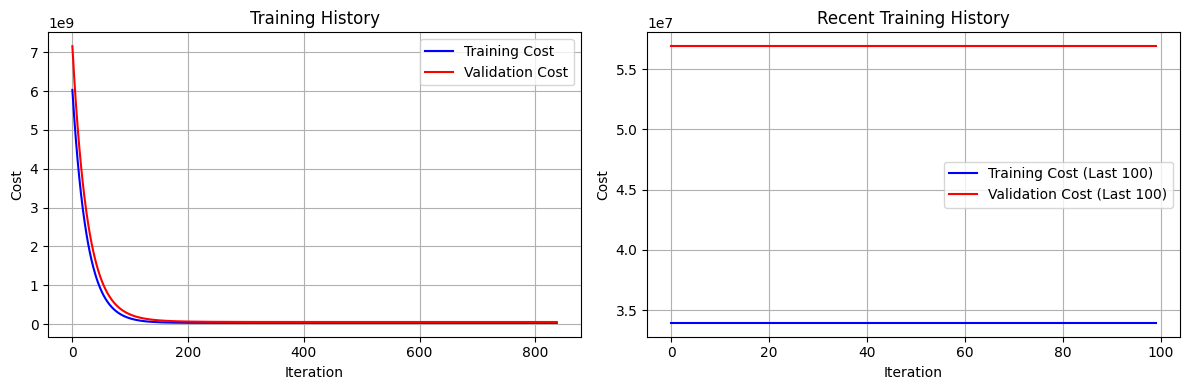

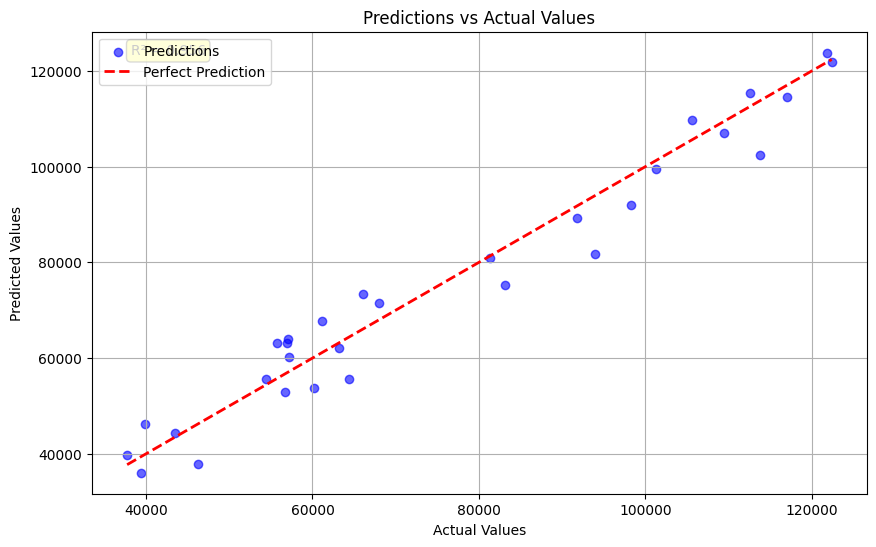


Model Summary:
LinearRegression(
    learning_rate=0.01,
    max_iterations=1000,
    regularization=ridge,
    alpha=0.01,
    n_iterations_=838,
    n_features=1,
    final_cost=33951874.662823
)


In [26]:
    # Create and train model
    model = LinearRegression_2(
        learning_rate=0.01,
        max_iterations=1000,
        regularization='ridge',
        alpha=0.01,
        early_stopping=True
    )
    
    model.fit(X,Y)
    
    # Make predictions
    predictions = model.predict(X)
    
    # Get metrics
    metrics = model.get_metrics(X,Y)
    print("Model Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # Plot results
    model.plot_training_history()
    model.plot_predictions(X,Y)
    
    print(f"\nModel Summary:\n{model}")
